# Deep Learning - Exercise 1
This lecture is about basics of the Tensorflow, we will discuss the minimal example on the MNIST dataset.

We also investigate a meaning of the validation sets and different complexity of the model. 

Moreover, we will look on the regulariozation and we will try to find optimal model for the MNIST dataset that is based on fully connected layers.

![meme01](https://github.com/rasvob/VSB-FEI-Deep-Learning-Exercises/blob/main/images/dl_meme_01.jpg?raw=true "AI Meme")

[Open in Google colab](https://colab.research.google.com/github/rasvob/VSB-FEI-Deep-Learning-Exercises/blob/main/dl_01.ipynb)
[Download from Github](https://github.com/rasvob/VSB-FEI-Deep-Learning-Exercises/blob/main/dl_01.ipynb)

##### Remember to set **GPU** runtime in Colab!

### Import of the TensorFlow
The main version of the TensorFlow (TF) is a in the Version package in the field VERSION
Since the TensformFlow 2.0 everything was encapsulaed under the KERAS api.

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

tf.version.VERSION

'2.11.0'

### Import a dataset
Datasets are stored in the keras.datasets submodule. Few testing datasets are stored here and installed together with the TF package

In [2]:
# mnist is the basic dataset with handwritten digits
mnist = tf.keras.datasets.mnist

# data from any dataset are loaded using the load_Data function
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# the data are in the form of 28x28 pixes with values 0-255.
print('Train data shape: ', x_train.shape)
print('Test data shape:  ', x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
Train data shape:  (60000, 28, 28)
Test data shape:   (10000, 28, 28)


The dataset consists of 60,000 training images and 10,000 testing images. All of the are 28x28 pixels. 

### Lets look on the data how do they look like.
Look closely on the value scale - it os from 0 to 255 as usual in grayscale  images.

### We can see that the numbers are already centered - you won't see this feature in the real world images often 🙂
Some of the images are quite easy to classify but on the other hand there is a lot of noise in the data as well.

Take a look at these two examples below? The 1st one is clear, but the 2nd one is 1 or 7?

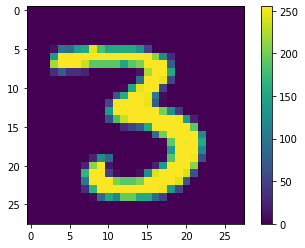

In [3]:
plt.figure()
plt.imshow(x_train[12])
plt.colorbar()
plt.grid(False)
plt.show()

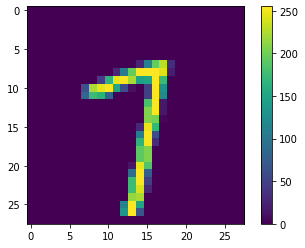

In [4]:
plt.figure()
plt.imshow(x_train[42])
plt.colorbar()
plt.grid(False)
plt.show()

### The conversion into range 0-1 is done by the division
* Lets normalize the values into the range \(0,1\) by dividing it 255.

* Why is this step helpful? (Hint: input magnitude and weights)

In [5]:
# The conversion into range 0-1 is done by the division
x_train, x_test = x_train / 255.0, x_test / 255.0

### Make better visualization of the data to better understand how complex they are
* You can see that "noisy" digit and different handwriting style is really no exception

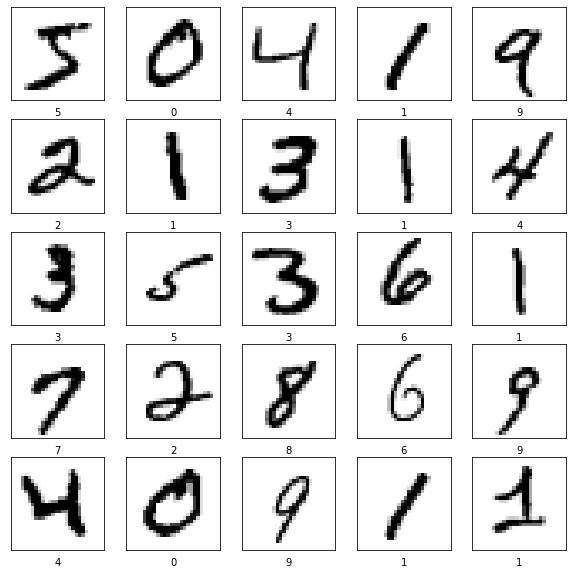

In [6]:
class_names = [str(x) for x in range(10)]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Before we dive in the deep learning territory, let's try to create some baseline model using a machine learning model so we can compare the approaches
* Are ML models capable of processing image data?
* How to deal with a matrix input?

In [7]:
alg = DecisionTreeClassifier()
alg.fit(x_train.reshape(-1, 28*28), y_train)

DecisionTreeClassifier()

In [8]:
y_pred = alg.predict(x_test.reshape(-1, 28*28))

In [9]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.8758

### We can see that we were able to create a classifier very easily.
* However it is no secret, that DL models accuracy on MNIST can be >= 98% even with simple architecture
* Given the fact, our result is not very impresive 🙂

## Basic model - a NN with very simple hierarchy
* Model is created using layers, many layers exists in the [layer submodule](https://www.tensorflow.org/api_docs/python/tf/keras/layers)
* Each layer uses a activation functions collected in the [module nn](https://www.tensorflow.org/api_docs/python/tf/nn)
 
#### There are 2 ways of using the Keras API, Sequential and Functional, we will start with the sequential one

* Why do we use activation functions?
* How is ANN different from lin. regression?

## Let's design our first ANN
* Can you draw such network on a table?

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),# Flatten module flatten the multidimension input into single vector 28x28 = 784 float numbers
    keras.layers.Dense(32, activation=tf.nn.relu), # standard dense-fully connected layer with the rectified lineaar function as an activation
    keras.layers.Dense(10, activation=tf.nn.softmax), # another fully-connected layer with softmax activation function
])

model.summary() # prints the summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


### What is the meaning of the *Total params* number?

### Compilation of the model
Each model need to be compiled to be able to fit to the data and predict the labels

#### Optimizers

* There are many optimizers available, you can experiment with different algorithms, most of them are based on gradient descent algorithm
* And of course gradient descent is not a limit, gradient-free methods are available as well, e.g. [Nevergrad library by META](https://github.com/facebookresearch/nevergrad)

**Selected optimizers:**
* Gradient descent
   * Works for the whole dataset and it is not suitable for large data
* Stochastic Gradiend Descent (SGD)
   * Approximate the real gradiend from selested subset of data (Stochasticity)
* Root Mean Square Propagation (RMSPRop)
   * Adapts the learnign rate with the running average of the recent gradients.
* Adamptive Moment Estimation (ADAM)
   * Averages gradients and secodn moment of the gradient and adapts the learning rate.

#### Loss functions
**Training of the ANN is about weights optimization. We need to some formula that says us if the optimization process is making the ANN better or not.**

**The choice of a loss function depends on tha task and network architecture. Below are the most common loss functions mentioned.**

* Mean Squared Error
   * a classical measure to be used in regression
   * a logarithmic version exists
* Mean Absolute Error (MAE)
   * take an absolute values instead of their squared version
* Binary classification Loss
   * a loss for binary problems only
   * predicts the probability of the class 1
* Binary Cross-Entropy
   * predict the class from the set {0,1}
   * requires a sigmoind activation function
* Categorical Cross-Entropy
   * default for mutli-class classification problems
   * requires the softmax function on output layer to compute probability of each layer
   * train labels have to be one-hot-encoded
* Sparse Categorical Cross-Entropy
   * the same as above but the tran lables are just labels not encoded.

#### Metrics
**Used metrics for the model prediction accuracy evaluation are the same as in the ML area, i.e. accuracy, f1-score, recall, etc. The choice depends on the task and the labels distribution.**

### Do you remember in which cases is the *accuracy* metric not a best choice? Which metrics are more suitable for these cases?

* Regression metrics
   * Mean Squared Error (MSE)
   * Mean Absolute Error (MAE)
   * Mean Absolute Percentage Error (MAPE)
* Classification metrics
   * Binary Accuracy
   * Categorical Accuracy
   * Sparse Categorical Accuracy
   * Top k Categorical Accuracy
   * Sparse Top k Categorical Accuracy
   * Accuracy - a general version that is modified based on the data analyzed autmatically

## We can compile the model now, we will use the accuracy metric
* Why do we use SparseCategoricalCrossentropy? What is from_logits parameter?

* SparseCategoricalCrossentropy = We expect labels to be provided as integers.

The output of the Dense layer will either return:
* probabilities: The output is passed through a SoftMax function which normalizes the output into a set of probabilities over n, that all add up to 1.
* logits: n activations.

Your loss function has to be informed as to whether it should expect a normalized distribution (output passed through a SoftMax function) or logits. 
If your output layer has a 'softmax' activation, from_logits should be False. If your output layer doesn't have a 'softmax' activation, from_logits should be True.

In [12]:
model.compile(optimizer='adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'],
    )

### Model visualization
Model then compiles and it is ready for fitting to the data. 

The model may be printed into image like the following image of our model:

<!-- ![model](https://github.com/jplatos/2019-2020-DA4/raw/master/images/da4_01_base.png "Base model of the neural network") -->

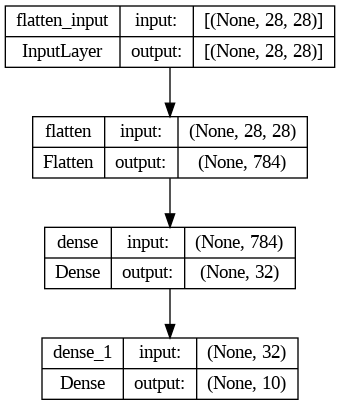

In [13]:
keras.utils.plot_model(model, show_shapes=True)

# Now we can fit the model to the input data
* The *fit()* method fit the model to the data, the parameters are *data* and *labels* from the train set and number of *epoch* to be trained.
* The *validation_split* parameter is also very common. What does the parameter do?
    * What is the validation set? How is it different from the test set?

## FAQ section 🙂
* How does the ANN training procedure look like?
* What is the *epoch*?
* What is the *batch*?
* Why do we use batches? 
    * Is possible to have batch of size *len(data)* or os size *1*? 
    * What are caveates of these cases?




# Define the callbacks
* Always use ModelCheckpoint callback so you overcome the possible overfitting in the last few epochs!
### The .fit() API is pretty powerful
- It is common to use some sort of a callback, we will use ModelCheckpoint callback which saves the best weights configuration obtained during training so the overfitting at the final phase of training will be suppressed

- **The best weights are determined using the validation loss value**

In [14]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights.best.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

# Fit the model

In [15]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=3, callbacks=[model_checkpoint_callback], batch_size=128)

Epoch 1/3
375/375 [==============================] - 8s 5ms/step - loss: 0.5535 - accuracy: 0.8481 - val_loss: 0.2738 - val_accuracy: 0.9235
Epoch 2/3
375/375 [==============================] - 1s 3ms/step - loss: 0.2587 - accuracy: 0.9268 - val_loss: 0.2224 - val_accuracy: 0.9385
Epoch 3/3
375/375 [==============================] - 1s 3ms/step - loss: 0.2143 - accuracy: 0.9390 - val_loss: 0.1973 - val_accuracy: 0.9441


# Let's take a look at the accuracy and loss function values for both - the train and validation set
* What can you see in the plot?
* Is OK that loss is getting lower and accuracy higher?
    * Can the loss function value go higher? 
* What if the training set loss is getting lower, but validation set loss higher? 
    * How do we call this situation?

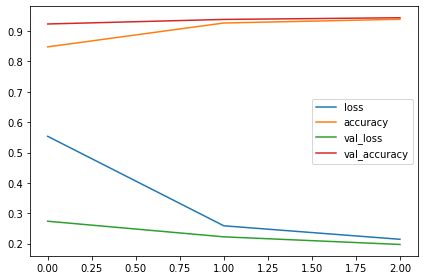

In [16]:
plt.figure()
for key in history.history.keys():
    plt.plot(history.epoch, history.history[key], label=key)
plt.legend()
plt.tight_layout()

# Beware that ANN are prone to overfitting!

### How does overfit look like?
* Y axis = Accuracy
* X axis = Epoch
![overfit](https://github.com/rasvob/VSB-FEI-Deep-Learning-Exercises/blob/main/images/overfit_acc.png?raw=true "Overfit")

# How can we solve the overfitting issue?

### 1 - Use simpler model
* The model often overfit because there is a lot of parameters for the amount of input data

### 2 - Use Dropout layer
- Node sampling instead of edge sampling 
- If a node is dropped, then all incoming and outgoing connections from that node need to be dropped as well
- We sample sub-networks from the original one - basically ensemble of networks
- There won't be some "alpha" node in the individual layer with huge weight coefficient
    - Responsibility for prediction will be shared among multiple nodes

![dropout](https://github.com/rasvob/2020-21-ARD/raw/master/images/dropout.jpeg "Dropout")

## Keras API
- keras.layers.Dropout(0.5)
- Take a look [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)

## Beware that the best weights needs to be loaded after the training is finished!
* **Otherwise you use the weights from the last epoch!**

In [17]:
model.load_weights("weights.best.hdf5")

## Now we can use *evaluate()* function for obtaining the accuracy using the test set

![meme02](https://github.com/rasvob/VSB-FEI-Deep-Learning-Exercises/blob/main/images/dl_meme_02.jpg?raw=true "AI Meme 02")

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1961 - accuracy: 0.9430
Test accuracy:  0.9430000185966492


# Can we obtain the labels and use it for our own evaluation without Keras? Sure!

## We will obtain the raw softmax outputs
* What is the range of the vector values?
* Do they sum-up to some number?

In [19]:
y_pred_proba = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
y_pred_proba[0]

array([1.5134590e-05, 1.8291857e-07, 1.8425664e-04, 1.0085898e-02,
       2.3303141e-07, 1.4441583e-05, 7.4161932e-08, 9.8902124e-01,
       5.2998446e-05, 6.2553561e-04], dtype=float32)

In [21]:
np.sum(y_pred_proba[0])

1.0

## Now we can extract the index of the highest probability and get the labels

In [22]:
y_pred = np.argmax(y_pred_proba, axis=1)

In [23]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

# Is the model any better than the ML baseline?

In [24]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.943

# We can now re-build the same network using a Functional API
* You can use any API that you like however I recomment the **Functional** one as it is more versatile, e.g. building ANN architecture with skip-connect synaptic links

In [25]:
ann_input = keras.layers.Input(shape=(28, 28))
flatten = keras.layers.Flatten()(ann_input)
hidden = keras.layers.Dense(32, activation=tf.nn.relu)(flatten)
ann_output = keras.layers.Dense(10, activation=tf.nn.softmax)(hidden)

model = keras.Model(ann_input, ann_output)

model.compile(optimizer='adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'],
    )

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## The rest is the same

In [26]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights.best.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

history = model.fit(x_train, y_train, validation_split=0.2, epochs=3, callbacks=[model_checkpoint_callback], batch_size=128)
model.load_weights("weights.best.hdf5")

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

Epoch 1/3
375/375 [==============================] - 2s 4ms/step - loss: 0.5603 - accuracy: 0.8495 - val_loss: 0.2899 - val_accuracy: 0.9178
Epoch 2/3
375/375 [==============================] - 1s 3ms/step - loss: 0.2757 - accuracy: 0.9218 - val_loss: 0.2374 - val_accuracy: 0.9336
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.2161 - accuracy: 0.9365
Test accuracy:  0.9365000128746033


# Now you have the model fully trained and now can be used for inference
* Imagine you want to use DL model in you web app, how would you do it? 
* Can you name some use cases for the DL models?

1) You can save the model to file so you don't need to train the model each time you want to use it
2) You can then just load the trained model and use is for inference

## Save the model
* Folder *mnist_model* will be created for the model data

In [27]:
model.save('mnist_model')

## Load the model back to memory and test the function

In [28]:
loaded_model = keras.models.load_model('mnist_model')
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2161 - accuracy: 0.9365
Test accuracy:  0.9365000128746033


# Tasks for the rest of the lecture (2p)
* Experiment with batch_sizes, use these two settings and compare the results (e.g. compare training time and accuracy) - **(0.5p)**
    1) Use batch_size=1
    2) Use batch_size=1024
    
* Add *Dropout()* layer just before the SoftMax output layer in you architecture use these two settings and compare the results (hint: take a look at the train and val accuracy) - **(0.5p)**
    1) Dropout(0.2)
    2) Dropout(0.95)
    
* Define your own architecture using either one of the showed API and try to beat the basic model - **(1p)**

In [29]:
def test_batch_size(batch_size):
  ann_input = keras.layers.Input(shape=(28, 28))
  flatten = keras.layers.Flatten()(ann_input)
  hidden = keras.layers.Dense(32, activation=tf.nn.relu)(flatten)
  ann_output = keras.layers.Dense(10, activation=tf.nn.softmax)(hidden)
  
  model = keras.Model(ann_input, ann_output)
  
  model.compile(optimizer='adam',
      loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics = ['accuracy'],
      )

  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
      filepath=f'weights.batch_size_{batch_size}.best.hdf5',
      save_weights_only=True,
      monitor='val_loss',
      mode='auto',
      save_best_only=True)
  
  history = model.fit(x_train, y_train, validation_split=0.2, epochs=3, callbacks=[model_checkpoint_callback], batch_size=batch_size)
  model.load_weights(f'weights.batch_size_{batch_size}.best.hdf5')
  
  test_loss, test_acc = model.evaluate(x_test, y_test)
  print(f'Test accuracy for batch size {batch_size}: {test_acc}')


test_batch_size(1)
test_batch_size(1024)

Epoch 1/3
48000/48000 [==============================] - 142s 3ms/step - loss: 0.2776 - accuracy: 0.9171 - val_loss: 0.2133 - val_accuracy: 0.9407
Epoch 2/3
48000/48000 [==============================] - 140s 3ms/step - loss: 0.1721 - accuracy: 0.9498 - val_loss: 0.1663 - val_accuracy: 0.9527
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1596 - accuracy: 0.9507
Test accuracy for batch size 1: 0.9506999850273132
Epoch 1/3
47/47 [==============================] - 1s 11ms/step - loss: 1.3863 - accuracy: 0.6340 - val_loss: 0.7225 - val_accuracy: 0.8450
Epoch 2/3
47/47 [==============================] - 0s 7ms/step - loss: 0.5650 - accuracy: 0.8591 - val_loss: 0.4130 - val_accuracy: 0.8943
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.3424 - accuracy: 0.9098
Test accuracy for batch size 1024: 0.9097999930381775


In [30]:
def test_dropout(dropout_prob):
  ann_input = keras.layers.Input(shape=(28, 28))
  flatten = keras.layers.Flatten()(ann_input)
  hidden = keras.layers.Dense(32, activation=tf.nn.relu)(flatten)
  dropout = keras.layers.Dropout(dropout_prob)(hidden)
  ann_output = keras.layers.Dense(10, activation=tf.nn.softmax)(dropout)
  
  model = keras.Model(ann_input, ann_output)
  
  model.compile(optimizer='adam',
      loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics = ['accuracy'],
      )

  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
      filepath=f'weights.dropout_{dropout_prob}.best.hdf5',
      save_weights_only=True,
      monitor='val_loss',
      mode='auto',
      save_best_only=True)
  
  history = model.fit(x_train, y_train, validation_split=0.2, epochs=3, callbacks=[model_checkpoint_callback], batch_size=128)
  model.load_weights(f'weights.dropout_{dropout_prob}.best.hdf5')
  
  test_loss, test_acc = model.evaluate(x_test, y_test)
  print(f'Test accuracy for dropout {dropout_prob}: {test_acc}')

test_dropout(0.2)
test_dropout(0.5)
test_dropout(0.95)

Epoch 1/3
375/375 [==============================] - 2s 4ms/step - loss: 0.7044 - accuracy: 0.7928 - val_loss: 0.2930 - val_accuracy: 0.9208
Epoch 2/3
375/375 [==============================] - 1s 3ms/step - loss: 0.3648 - accuracy: 0.8944 - val_loss: 0.2339 - val_accuracy: 0.9345
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.2059 - accuracy: 0.9406
Test accuracy for dropout 0.2: 0.9405999779701233
Epoch 1/3
375/375 [==============================] - 2s 4ms/step - loss: 2.2527 - accuracy: 0.1411 - val_loss: 1.9138 - val_accuracy: 0.5806
Epoch 2/3
375/375 [==============================] - 2s 4ms/step - loss: 2.1579 - accuracy: 0.1635 - val_loss: 1.6753 - val_accuracy: 0.7299
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 1.5250 - accuracy: 0.7725
Test accuracy for dropout 0.95: 0.7724999785423279


In [31]:
in_layer = keras.layers.Input(shape=(28, 28, 1))
conv1 = keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1))(in_layer)
pool1 = keras.layers.MaxPooling2D((2, 2))(conv1)
conv2 = keras.layers.Conv2D(13, (3, 3), activation='relu', input_shape=(13, 13, 1))(pool1)
dropout1 = keras.layers.Dropout(0.4)(conv2)
flatten = keras.layers.Flatten()(conv2)
hidden = keras.layers.Dense(32, activation=tf.nn.relu)(flatten)
dropout2 = keras.layers.Dropout(0.4)(hidden)
ann_output = keras.layers.Dense(10, activation=tf.nn.softmax)(dropout2)

model = keras.Model(in_layer, ann_output)

model.compile(optimizer='adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'],
    )

# model.summary()

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=f'weights.conv.best.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

history = model.fit(x_train, y_train, validation_split=0.2, epochs=3, callbacks=[model_checkpoint_callback], batch_size=128)
model.load_weights(f'weights.conv.best.hdf5')

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy for CNN: {test_acc}')

Epoch 1/3
375/375 [==============================] - 9s 7ms/step - loss: 0.6010 - accuracy: 0.8087 - val_loss: 0.1278 - val_accuracy: 0.9640
Epoch 2/3
375/375 [==============================] - 2s 5ms/step - loss: 0.2301 - accuracy: 0.9316 - val_loss: 0.0858 - val_accuracy: 0.9749
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.0617 - accuracy: 0.9803
Test accuracy for CNN: 0.9803000092506409
